Función Sigmoide

Por demostrar:    

$\frac{d \sigma (x)}{dx}=\sigma(x)(1-\sigma(x))$

Comencemos a desarrollar la parte izquierda de la equación

$\frac{d \sigma (x)}{dx}=\frac{d }{dx}(1+ e^{-x}))^{-1}=-(1+ e^{-x}))^{-2}\frac{d }{dx}(1+ e^{-x}))$  

$=-(1+ e^{-x})^{-2}(\frac{d}{dx}[1]+\frac{d e^{-x}}{dx})=-(1+ e^{-x})^{-2}(e^{-x}\frac{d}{dx}[-x])=-(1+ e^{-x})^{-2}(-e^{-x})$  

$=(1+ e^{-x})^{-2}(e^{-x})=\frac{(e^{-x})}{(1+ e^{-x})(1+ e^{-x})}=\frac{1}{(1+ e^{-x})}(1-\frac{1}{(1+ e^{-x})})$  

$\frac{1}{(1+ e^{-x})}(1-\frac{1}{(1+ e^{-x})})=\sigma(x)(1-\sigma(x))  _{\bullet}$

In [292]:
import os
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
os.chdir("C:/Users/migro/Diplomado")
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split, cross_validate
from sklearn.preprocessing import PolynomialFeatures

In [293]:
import pandas as pd
housing = pd.read_csv("../Diplomado/ModuloIV/datos/house-prices-advanced-regression-techniques/train.csv")
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [294]:
housing.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


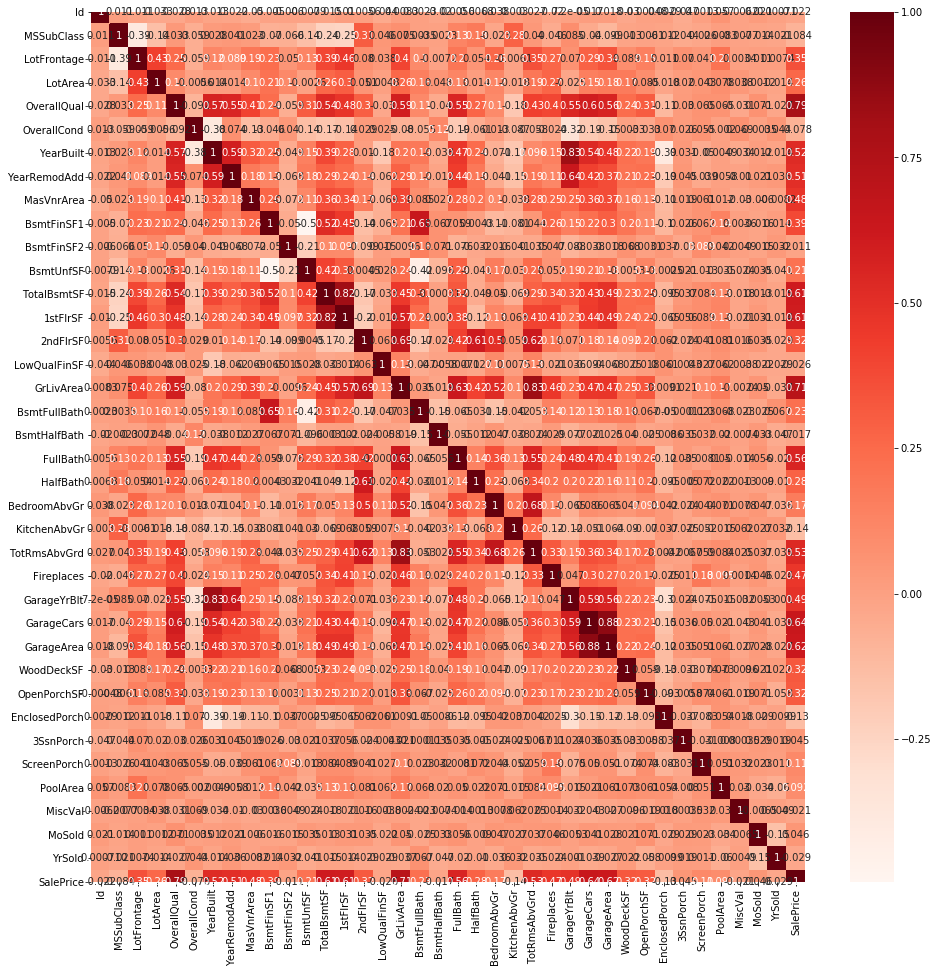

In [295]:
#Pearson Correlation
plt.figure(figsize=(16,16))
cor = housing.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [296]:
#Correlation with output variable
cor_target = abs(cor['SalePrice'])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.25]
relevant_features
lista=list(relevant_features.index)+['MSZoning', 'SaleCondition']
relevant_features

LotFrontage     0.351799
LotArea         0.263843
OverallQual     0.790982
YearBuilt       0.522897
YearRemodAdd    0.507101
MasVnrArea      0.477493
BsmtFinSF1      0.386420
TotalBsmtSF     0.613581
1stFlrSF        0.605852
2ndFlrSF        0.319334
GrLivArea       0.708624
FullBath        0.560664
HalfBath        0.284108
TotRmsAbvGrd    0.533723
Fireplaces      0.466929
GarageYrBlt     0.486362
GarageCars      0.640409
GarageArea      0.623431
WoodDeckSF      0.324413
OpenPorchSF     0.315856
SalePrice       1.000000
Name: SalePrice, dtype: float64

In [297]:
#Nos quedamos con las variables más correlacionadas
housing=housing[lista]

In [298]:
housing.shape

(1460, 23)

In [299]:
housing.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

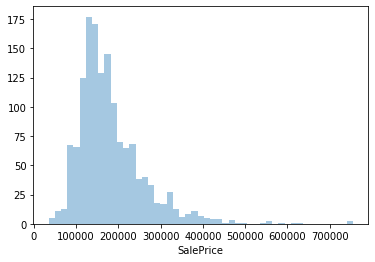

In [300]:
sns.distplot(housing.SalePrice, kde=False)

In [307]:
column_selector = ColumnTransformer(
    [("label_bin", OneHotEncoder(sparse=False), ["MSZoning", "SaleCondition"]),
     ("numeric", SimpleImputer(), make_column_selector(dtype_include="float"))]
)

pipe = Pipeline([
    ("select_cols", column_selector),
    #("poly", PolynomialFeatures(degree = 2)),
    #("model", LinearRegression())
    #("model", Lasso(alpha=0.1, tol=0.5))
    ("model", Ridge(alpha=0.1))
])

In [308]:
train, test = train_test_split(housing, test_size=0.05, random_state=2718)
xtrain, ytrain = train.drop("SalePrice", axis=1), train["SalePrice"]

cv = cross_validate(pipe, xtrain, ytrain, cv=5, scoring=["r2", "neg_mean_absolute_error"])
r2 = cv["test_r2"]
mae = -cv["test_neg_mean_absolute_error"]

In [309]:
print(f"mean r2: {r2.mean():0.3f}")
print(f"mean mae: {mae.mean():,.3f}")

mean r2: 0.441
mean mae: 41,534.455
